In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [4]:
pelvis = pd.read_csv('David-60-pokus03/Xsens_DOT_2_D422CD006474_20250409_110030.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-60-pokus03/Xsens_DOT_4_D422CD006380_20250409_110030.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-60-pokus03/Xsens_DOT_3_D422CD006379_20250409_110030.csv', skiprows= 7,  sep=',')

In [5]:
right.head()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,0,2285123563,-179.275345,-86.539948,-114.791328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2285140230,-178.942276,-86.559578,-115.164452,9.791438,-0.448870,0.617365,-2.378517,0.008555,-0.413216
2,2,2285156897,-178.653549,-86.575493,-115.509918,9.750091,-0.545654,0.623088,-2.963742,-0.213629,-0.546159
3,3,2285173564,-178.348206,-86.591652,-115.851501,9.744994,-0.656392,0.670438,-1.658384,-0.175588,-0.576593
4,4,2285190231,-178.009201,-86.612160,-116.188988,9.798283,-0.601568,0.681836,0.182747,0.091732,-0.587178


In [6]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()


# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [13]:
right.head()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,2285123563,-179.275345,-86.539948,-114.791328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,2285140230,-178.942276,-86.559578,-115.164452,9.791438,-0.448870,0.617365,-2.378517,0.008555,-0.413216,16667,0.016667,16.667,16.667
2,2,2285156897,-178.653549,-86.575493,-115.509918,9.750091,-0.545654,0.623088,-2.963742,-0.213629,-0.546159,33334,0.033334,33.334,16.667
3,3,2285173564,-178.348206,-86.591652,-115.851501,9.744994,-0.656392,0.670438,-1.658384,-0.175588,-0.576593,50001,0.050001,50.001,16.667
4,4,2285190231,-178.009201,-86.612160,-116.188988,9.798283,-0.601568,0.681836,0.182747,0.091732,-0.587178,66668,0.066668,66.668,16.667


In [11]:
right.head()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,2285123563,-179.275345,-86.539948,-114.791328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,2285140230,-178.942276,-86.559578,-115.164452,9.791438,-0.448870,0.617365,-2.378517,0.008555,-0.413216,16667,0.016667,16.667,16.667
2,2,2285156897,-178.653549,-86.575493,-115.509918,9.750091,-0.545654,0.623088,-2.963742,-0.213629,-0.546159,33334,0.033334,33.334,16.667
3,3,2285173564,-178.348206,-86.591652,-115.851501,9.744994,-0.656392,0.670438,-1.658384,-0.175588,-0.576593,50001,0.050001,50.001,16.667
4,4,2285190231,-178.009201,-86.612160,-116.188988,9.798283,-0.601568,0.681836,0.182747,0.091732,-0.587178,66668,0.066668,66.668,16.667


In [7]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,693.000000,693.000000
mean,0.481577,5766.782000
std,6.886280,3336.669296
min,-84.627098,0.000000
25%,0.633926,2883.391000
50%,0.750501,5766.782000
75%,0.960026,8650.173000
max,50.947372,11533.564000


In [8]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,693.000000,693.000000
mean,-1.043615,5766.782000
std,8.571508,3336.669296
min,-126.697113,0.000000
25%,-0.613471,2883.391000
50%,-0.476938,5766.782000
75%,-0.342230,8650.173000
max,93.657524,11533.564000


In [9]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,693.000000,693.000000
mean,1.113479,5766.782000
std,3.149784,3336.669296
min,-6.940192,0.000000
25%,0.375338,2883.391000
50%,0.512697,5766.782000
75%,0.697759,8650.173000
max,35.858597,11533.564000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

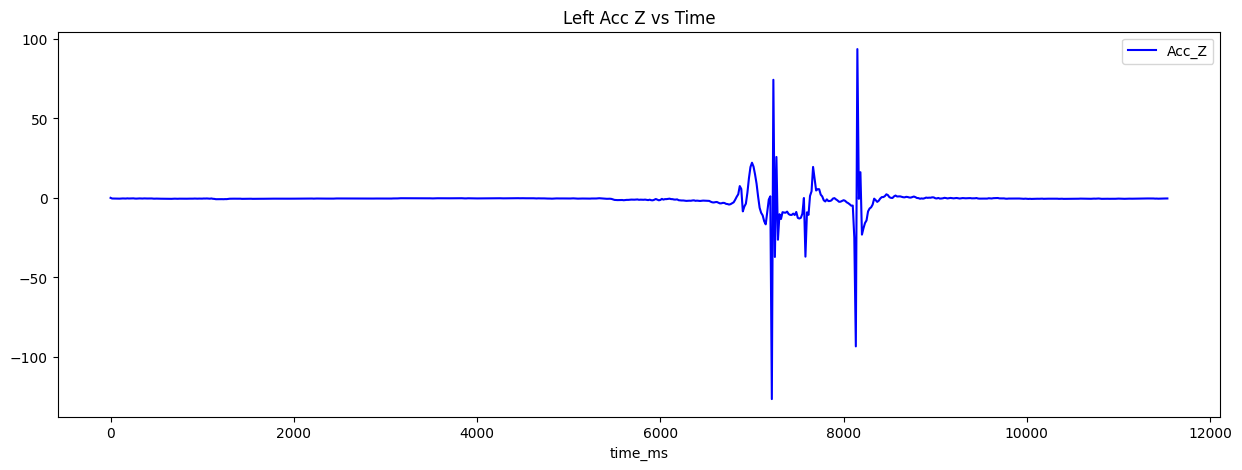

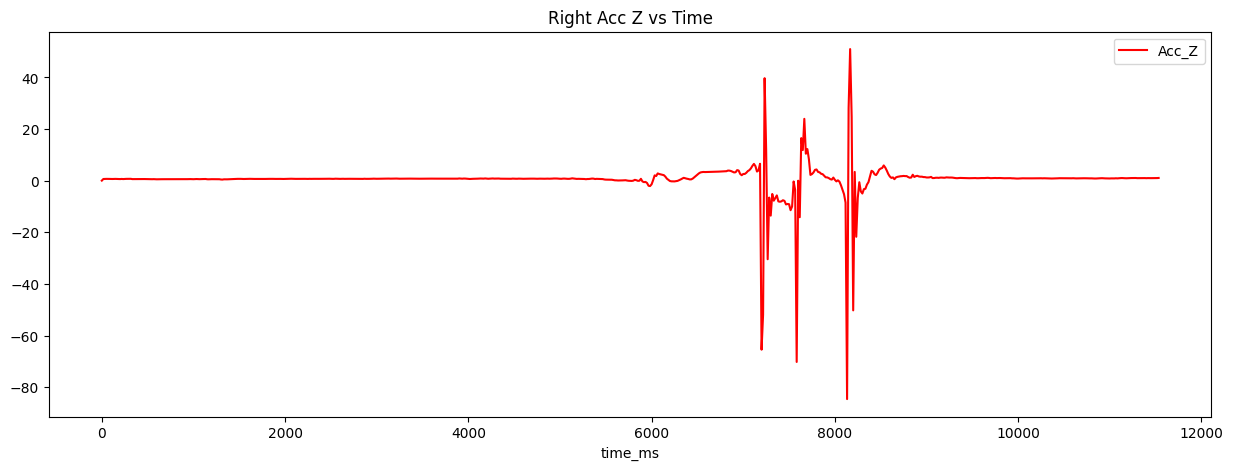

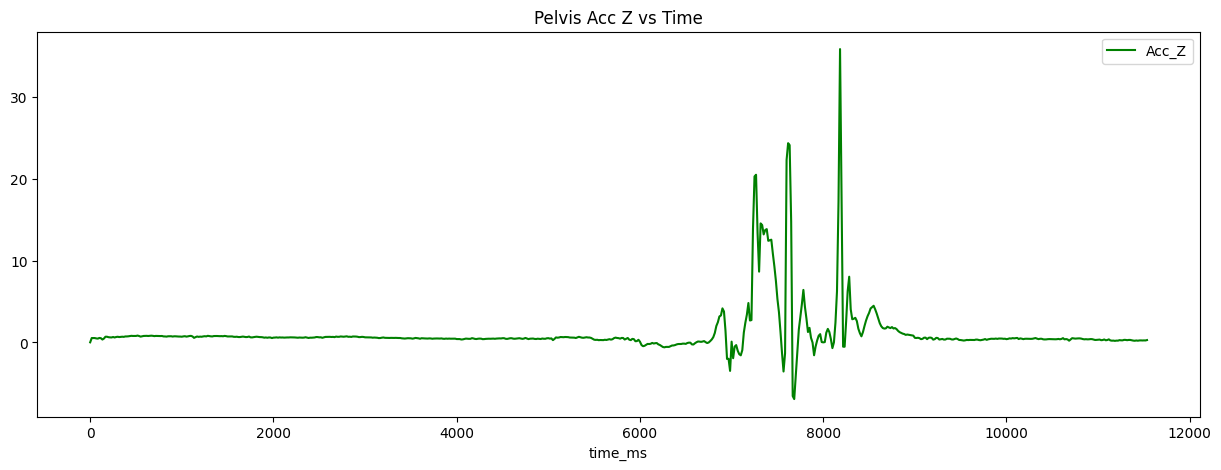

In [10]:
# visualize the data and find the connection between the accelerometer  and ties 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')